## Importing Libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import sklearn
import matplotlib.pyplot as plt
import librosa.display

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import librosa
audio_path = '/content/drive/My Drive/Dataset/Actor_01/03-01-01-01-01-01-01.wav'

x,sr = librosa.load(audio_path)

Mounted at /content/drive


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

## Plots

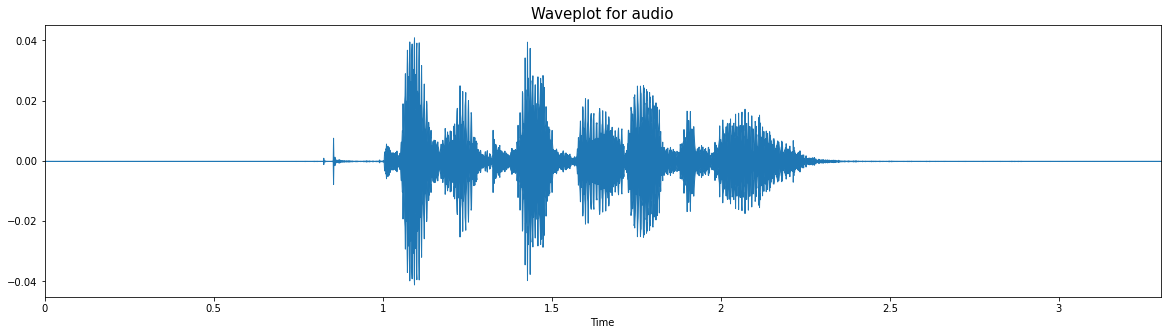

In [ ]:
def create_waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot for audio', size=15)
    librosa.display.waveplot(x, sr=sr)
    plt.show()

# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(x, sr=sr)       #create_waveplot() function for the same

create_waveplot(x, sr)

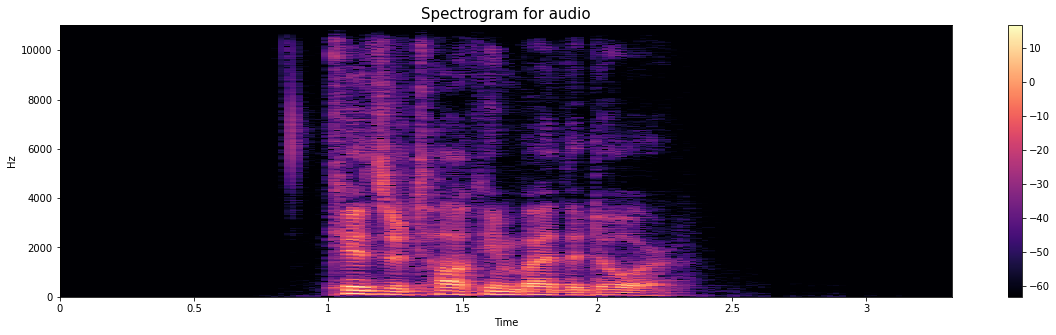

In [ ]:
def create_spectogram(x, sr):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    plt.title('Spectrogram for audio', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

create_spectogram(x, sr)

# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(20, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')    #create_spectogram() function for the same
# plt.colorbar()

## Feature Extraction

Zero Crossing Rate

In [ ]:
# n0 = 9000
# n1 = 9400
# plt.figure(figsize=(20, 5))
# plt.plot(x)
# plt.grid()

zero_crossings = librosa.zero_crossings(x, pad=False)
zero_crossings.shape

# print(sum(zero_crossings))

(72838,)

MFCC

(20, 143)


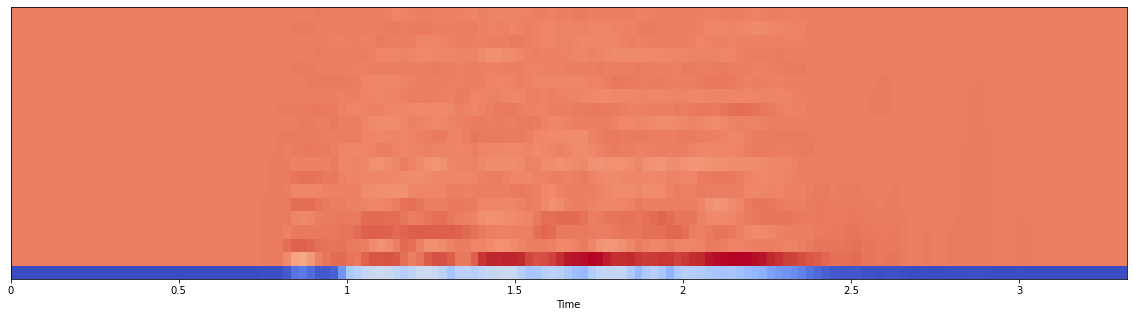

In [ ]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Spectral Centroid

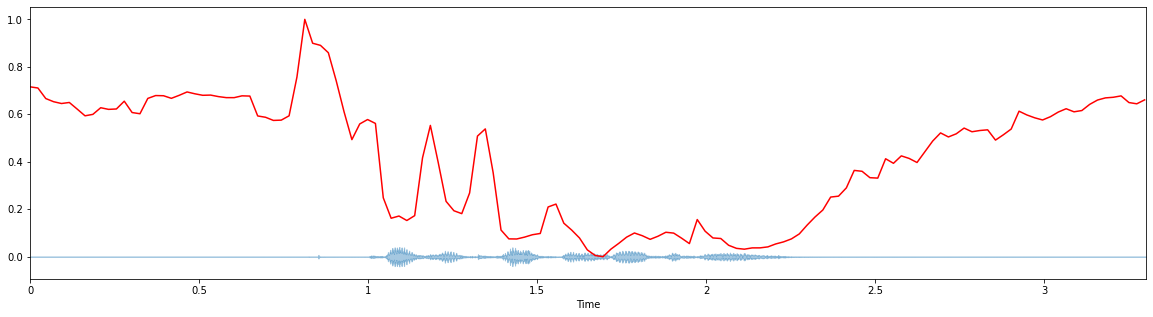

In [ ]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0] 
# spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(20,5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

Spectral Rolloff

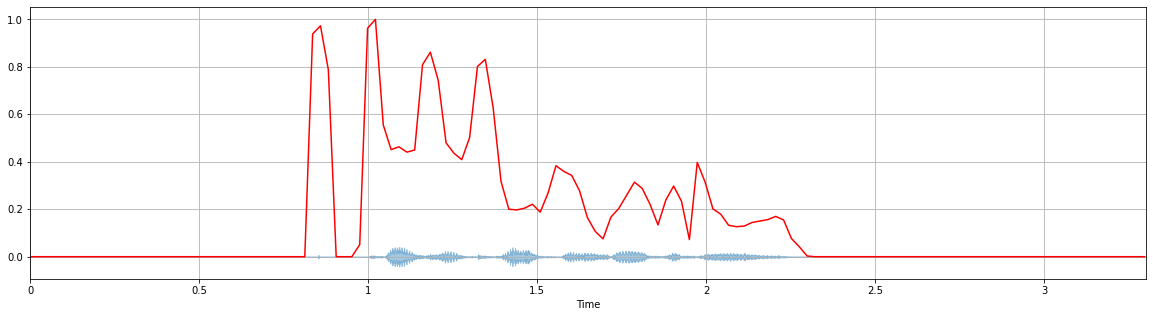

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

MFCCS

[ 1.0003577e-08  2.6676204e-08  3.3345255e-09  0.0000000e+00
 -6.6690511e-09 -6.6690511e-09 -2.6676204e-08 -7.5026829e-09
  1.3338102e-08  7.0858670e-09 -1.0420392e-10  3.3345255e-09
  0.0000000e+00 -1.3338102e-08  6.6690511e-09  6.6690511e-09
  7.2942745e-09 -6.6690511e-09  0.0000000e+00  0.0000000e+00]
[1.0000001 1.        1.0000001 1.        1.        1.        1.
 1.0000001 1.        1.        1.        1.        1.        1.0000001
 1.        1.        1.        1.        1.        1.       ]


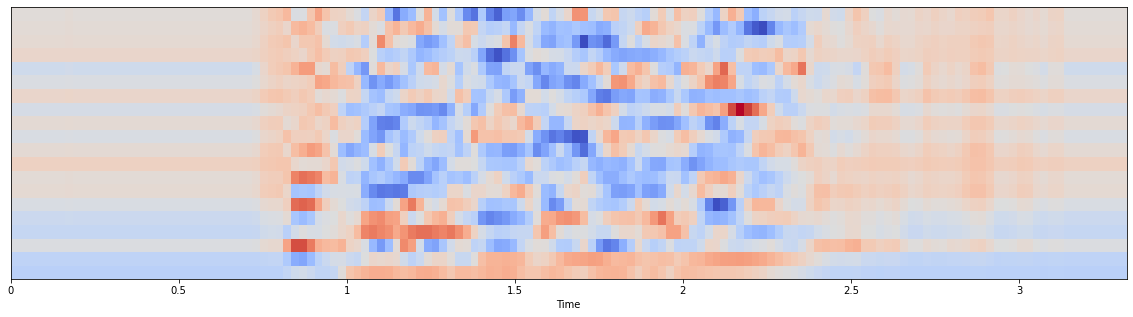

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma frequencies


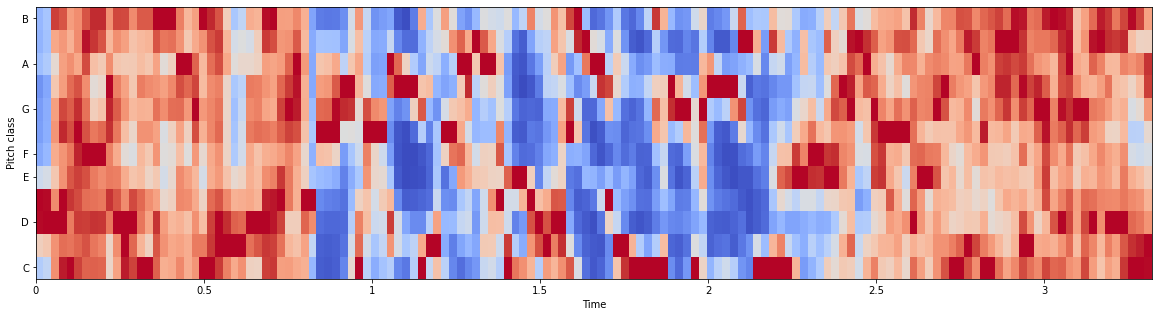

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def features(x, sr):
    result = np.array([])

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=x).T, axis=0)
    result=np.hstack((result, zcr)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Chroma_stft
    stft = np.abs(librosa.stft(x))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) 

    # Spectral Centroid
    speCen = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)[0])
    result = np.hstack((result, speCen))

      # spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0] 
      # t = librosa.frames_to_time(range(len(spectral_centroids)))
      # # librosa.display.waveplot(x, sr=sr, alpha=0.4)
      # plt.plot(t, normalize(spectral_centroids), color='r')
    
    # Spectral Rolloff
    specRollOff = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))
    result = np.hstack((result, specRollOff))

    # Fourier Tempogram
    fourierTempgram = np.mean(librosa.feature.fourier_tempogram(y=x, sr=sr))
    result = np.hstack((result, fourierTempgram))
 
    return result


features(x, sr)

array([ 3.26236752e-01+0.j        , -6.97984192e+02+0.j        ,
        5.52284889e+01+0.j        ,  3.23863208e-01+0.j        ,
        1.27753773e+01+0.j        ,  7.39614820e+00+0.j        ,
        8.66223931e-01+0.j        , -3.55027580e+00+0.j        ,
       -2.82833147e+00+0.j        , -1.13055334e+01+0.j        ,
       -2.52492666e+00+0.j        ,  4.96104419e-01+0.j        ,
       -2.72292686e+00+0.j        ,  1.64580023e+00+0.j        ,
       -3.43196416e+00+0.j        ,  1.40356421e-01+0.j        ,
        1.07315946e+00+0.j        , -4.35567188e+00+0.j        ,
       -1.58377123e+00+0.j        , -1.59300876e+00+0.j        ,
       -6.59361184e-01+0.j        ,  7.50463605e-01+0.j        ,
        7.89710760e-01+0.j        ,  7.77893186e-01+0.j        ,
        7.82118499e-01+0.j        ,  7.39671528e-01+0.j        ,
        6.80501044e-01+0.j        ,  6.83998823e-01+0.j        ,
        7.28766799e-01+0.j        ,  7.55842924e-01+0.j        ,
        7.46300340e-01+0.